Wrapping method

Uses of Wrapping method

Use combinations of variables to determine predictive power.

To find the best combination of variables.

Computationally expensive than filter method.

To perform better than filter method.

Not recommended on high number of features.

Forward Step Selection

In this wrapping method, it selects one best feature every time and finally it combines all the best features for the best accuracy.

Backward Step Selection

It is reverse process of Forward Step Selection method, intially it takes all the features and remove one by one every time. Finally it left with required number of features for the best accuracy.

Exhaustive Feature Selection

It is also called as subset selection method.

It fits the model with each possible combinations of N features.

( y = B0, y = B0 + B1.X1, y = C0 + C1.X2 )

It requires massive computational power.

It uses test error to evaluate model performance.

Drawback

It is a slower method compared to step forward and back ward methods.

In [1]:
!pip install mlxtend

How it works

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached. There are 4 different flavors of SFAs available via the SequentialFeatureSelector:

Sequential Forward Selection (SFS)

Sequential Backward Selection (SBS)

Sequential Forward Floating Selection (SFFS)

Sequential Backward Floating Selection (SBFS)

# Step Forward Selection (SFS)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [5]:
data = load_wine()

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [7]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [8]:
X = pd.DataFrame(data.data)
y = data.target

In [9]:
X.columns = data.feature_names
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [10]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((142, 13), (36, 13))

Step Forward Feature Selection (SFS)

Here, we are using SequentialFeatureSelector() and passing Random Forest Classifier in this we are passing number of estimators, random_state and number of jobs.

k number of features are the required number of features.
In this case, since it is forward step method, forward is equal to True.
For verbose it is for log here we are using 2.
Cross validation set,here we are choosing as 4.
Number of jobs means how many cores we will use, here -1 means use all the available core in this system.

In [13]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    3.7s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.1s finished

[2020-10-26 12:58:15] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.6s finished

[2020-10-26 12:58:17] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.5s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.7s finished

[2020-10-26 12:58:20] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend Lok

In [14]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'proline')

In [15]:
sfs.k_feature_idx_

(0, 2, 4, 6, 8, 9, 12)

In [16]:
sfs.k_score_ #max accuracy

0.9791666666666666

In [17]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

feature_idx                                          cv_scores  \
1                    (6,)  [0.7222222222222222, 0.8333333333333334, 0.742...   
2                  (6, 9)  [0.9444444444444444, 1.0, 0.9714285714285714, ...   
3               (4, 6, 9)  [0.9722222222222222, 1.0, 0.9714285714285714, ...   
4           (4, 6, 9, 12)  [0.9722222222222222, 0.9722222222222222, 0.971...   
5        (2, 4, 6, 9, 12)  [0.9444444444444444, 0.9722222222222222, 0.971...   
6     (2, 4, 6, 8, 9, 12)  [0.9722222222222222, 0.9722222222222222, 0.971...   
7  (0, 2, 4, 6, 8, 9, 12)  [0.9444444444444444, 0.9722222222222222, 1.0, ...   

  avg_score                                      feature_names   ci_bound  \
1   0.76746                                      (flavanoids,)  0.0670901   
2  0.971825                      (flavanoids, color_intensity)   0.031492   
3  0.985913           (magnesium, flavanoids, color_intensity)  0.0225862   
4  0.978968  (magnesium, flavanoids, color_intensity, proline)  0.0194714   
5  0.972024  (ash, magnesium, flavanoids, color_intensity, ...  0.0314903   
6  0.978968  (ash, magnesium, flavanoids, proanthocyanins, ...  0.0194714   
7  0.979167  (alcohol, ash, magnesium, flavanoids, proantho...  0.0369201   

     std_dev     std_err  
1  0.0418533    0.024164  
2  0.0196459   0.0113425  
3  0.0140901  0.00813492  
4   0.012147  0.00701308  
5  0.0196449    0.011342  
6   0.012147  0.00701308  
7  0.0230321   0.0132976

In [18]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    3.6s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    5.0s finished

[2020-10-26 13:05:31] Features: 1/8 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.7s finished

[2020-10-26 13:05:34] Features: 2/8 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.6s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    1.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.6s finished

[2020-10-26 13:05:37] Features: 3/8 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend Lok

In [19]:
sfs.k_score_

0.9859126984126985

In [20]:
sfs.k_feature_names_

('magnesium', 'flavanoids', 'color_intensity')

# Step Backward Selection (SBS)

In [21]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 8),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.8s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.6s finished

[2020-10-26 13:07:30] Features: 12/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.6s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.7s finished

[2020-10-26 13:07:33] Features: 11/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.8s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    2.9s finished

[2020-10-26 13:07:36] Features: 10/1 -- score: 0.9791666666666666[Parallel(n_jobs=-1)]: Using backend 

In [22]:
sbs = sfs
sbs.k_score_

0.9859126984126985

In [23]:
sbs.k_feature_names_

('alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'flavanoids',
 'nonflavanoid_phenols',
 'color_intensity')

# Exhaustive Feature Selection (EFS)

In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [25]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 4,
          max_features= 5,
          scoring='accuracy',
          cv = None,
          n_jobs=-1
         ).fit(X_train, y_train)

Features: 2002/2002

    C(13, 4) + C(13, 5) = 715 + 1287

In [26]:
715 + 1287

2002

In [27]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [28]:
efs.best_score_

1.0

In [29]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [30]:
efs.best_idx_

(0, 1, 2, 3)

In [31]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


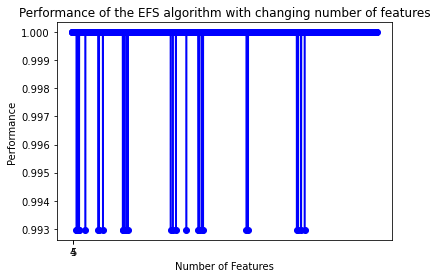

In [32]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
plt.title('Performance of the EFS algorithm with changing number of features')
plt.show()